In [2]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from definitions import ROOT_DIR


: 

In [3]:
bids_df_path = ROOT_DIR / "data" / "online_rl_data" / "bids.parquet"
pvalues_df_path = ROOT_DIR / "data" / "online_rl_data" / "pvalues.parquet"

bids_df = pd.read_parquet(bids_df_path)
bids_df["bid"] = bids_df["bid"].apply(np.stack)
bids_df["isExposed"] = bids_df["isExposed"].apply(np.stack)
bids_df["cost"] = bids_df["cost"].apply(np.stack)
pvalues_df = pd.read_parquet(pvalues_df_path)

In [3]:
bids_df.head()

,deliveryPeriodIndex,timeStepIndex,bid,isExposed,cost
0,7.0,0.0,"[[0.1265733242034912, 0.13402602076530457, 0.1...","[[0.0, 1.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[[0.11084364354610443, 0.1265733242034912, 0.1..."
1,7.0,1.0,"[[0.25059783458709717, 0.26650363206863403, 0....","[[1.0, 1.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[[0.2296399623155594, 0.25059783458709717, 0.2..."
2,7.0,2.0,"[[0.19306783378124237, 0.2726195156574249, 0.3...","[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, ...","[[0.17443086206912994, 0.19306783378124237, 0...."
3,7.0,3.0,"[[0.1325601190328598, 0.14023850858211517, 0.4...","[[0.0, 0.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, ...","[[0.1263553649187088, 0.1325601190328598, 0.14..."
4,7.0,4.0,"[[0.15807925164699554, 0.27511119842529297, 0....","[[0.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, ...","[[0.14244763553142548, 0.15807925164699554, 0...."


In [4]:
pvalues_df.head()

,deliveryPeriodIndex,timeStepIndex,advertiserNumber,advertiserCategoryIndex,pValue,pValueSigma
0,7.0,0.0,0.0,0.0,"[0.00596384285017848, 0.0032935335766524076, 0...","[0.0004537642525974661, 0.0008813931490294635,..."
1,7.0,0.0,1.0,0.0,"[0.006934208329766989, 0.01208933349698782, 0....","[0.0010528662241995335, 0.0036268001422286034,..."
2,7.0,0.0,2.0,0.0,"[0.0037916868459433317, 0.006614093203097582, ...","[0.0002731436979956925, 0.0005080730770714581,..."
3,7.0,0.0,3.0,0.0,"[0.0015582982450723648, 0.0008888263255357742,...","[0.00017231170204468071, 6.043421308277175e-05..."
4,7.0,0.0,4.0,0.0,"[0.006400680169463158, 0.008959032595157623, 0...","[0.00013234835932962596, 0.001759271719492972,..."


In [5]:
# advertiser_idx = 4
# target_cpa = 9

# ad_pvalues_df = pvalues_df[pvalues_df["advertiserNumber"] == advertiser_idx]

# min_cost_list = []
# pvalues_list = []
# for ts in ad_pvalues_df.timeStepIndex.unique():
#     ts_min_cost = bids_df[bids_df.timeStepIndex == ts].cost.item()[:, 0]
#     min_cost_list.append(ts_min_cost)
#     ts_pvalues = ad_pvalues_df[ad_pvalues_df.timeStepIndex == ts].pValue.item()
#     pvalues_list.append(ts_pvalues)
# pvalues = np.concatenate(pvalues_list)
# min_cost = np.concatenate(min_cost_list)

# # Plot the cost and the pvalues in the lists and color them depending on the ts
# for ts, (ts_pvalues, ts_min_cost) in enumerate(zip(pvalues_list, min_cost_list)):
#     fig, ax = plt.subplots()
#     plt.plot(pvalues, target_cpa * pvalues, "r-")
#     ax.scatter(ts_pvalues, ts_min_cost, alpha=0.1, s=1, label=f"ts={ts}")
#     ax.set_xlim(0, pvalues.max())
#     ax.set_ylim(0, min_cost.max())
#     ax.set_xlabel("pValues")
#     ax.set_ylabel("Least winning cost")
#     ax.set_title(f"ts {ts}")

/tmp/ipykernel_163223/2953402669.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


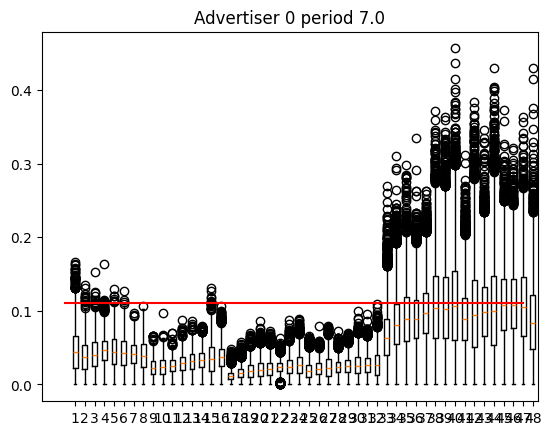

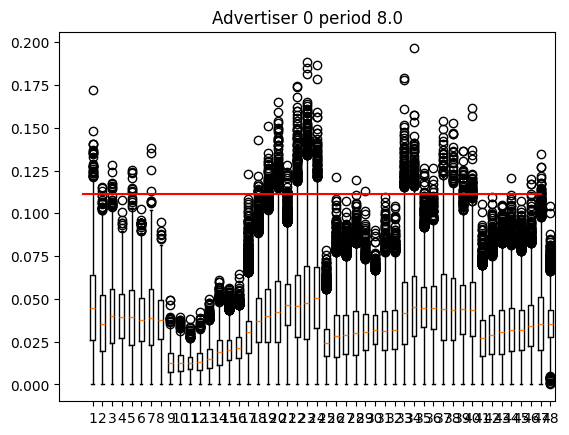

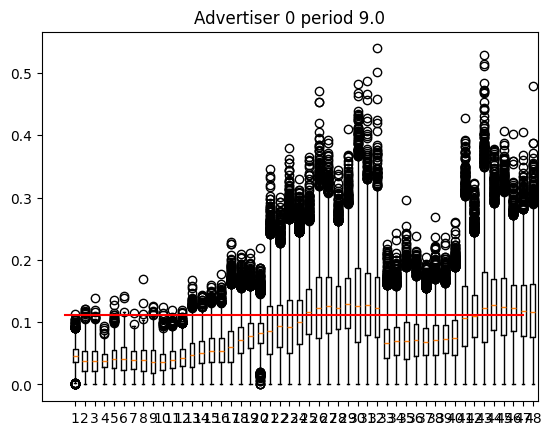

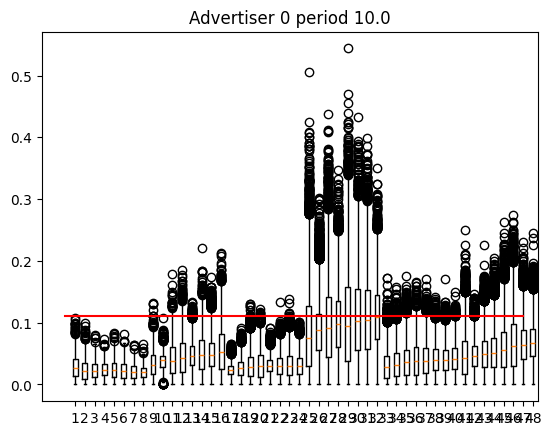

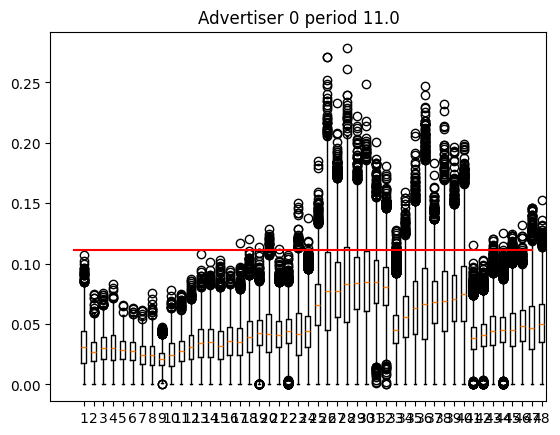

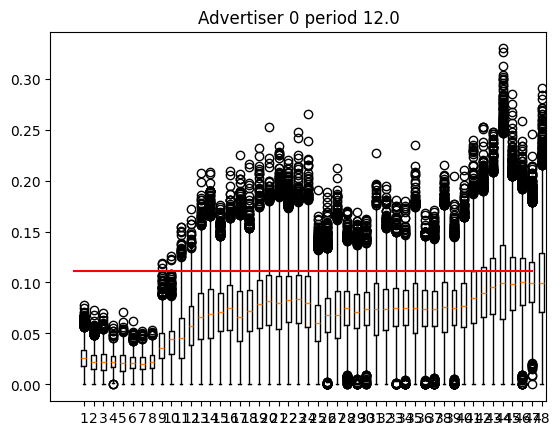

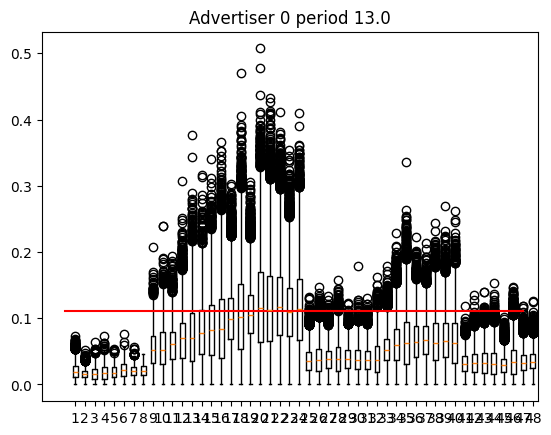

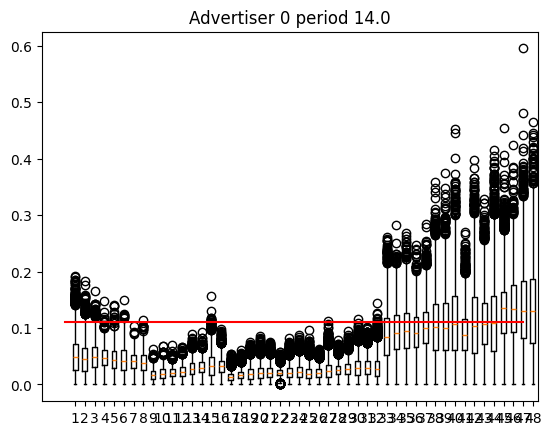

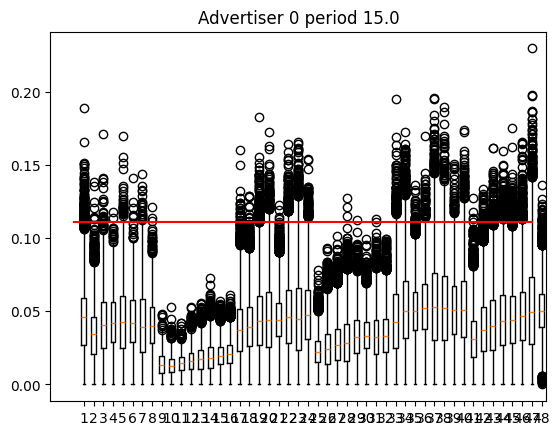

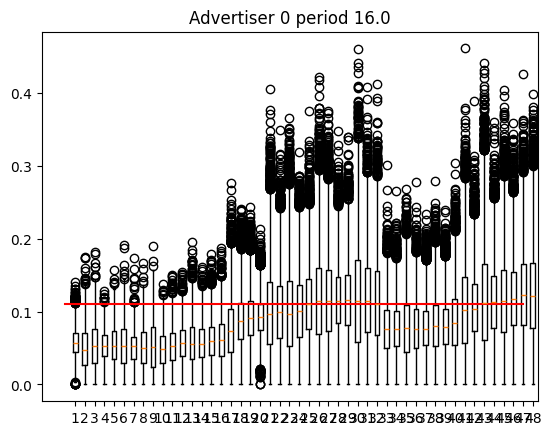

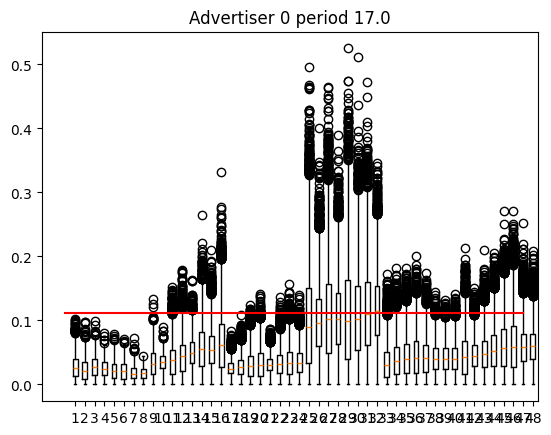

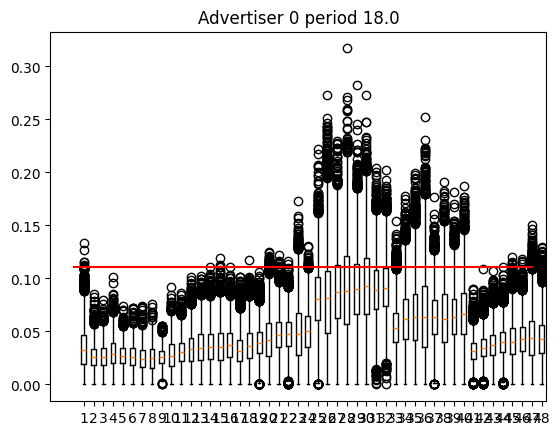

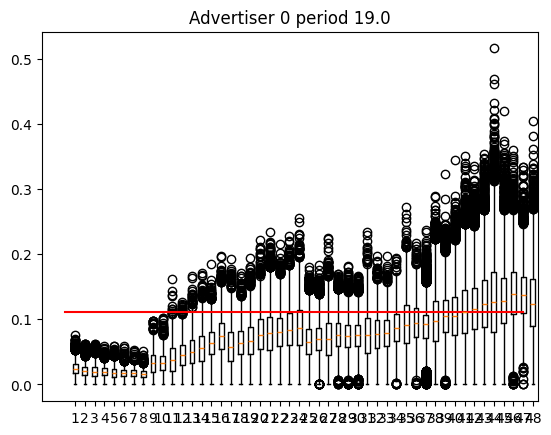

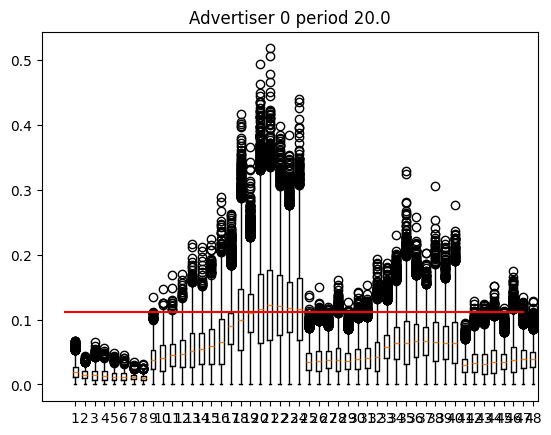

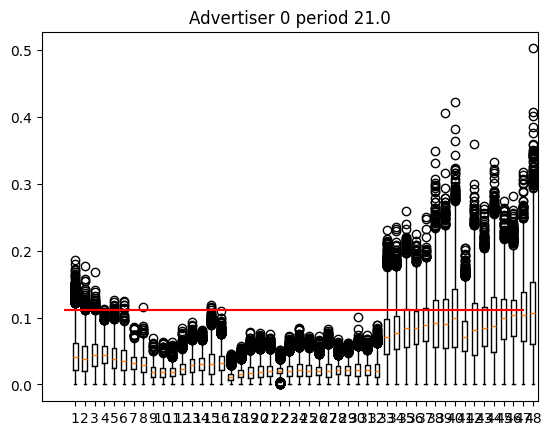

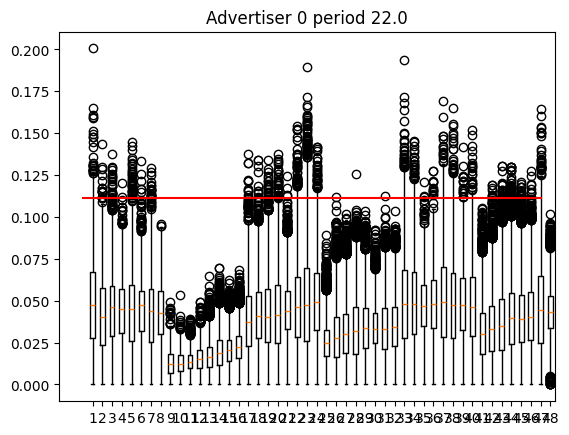

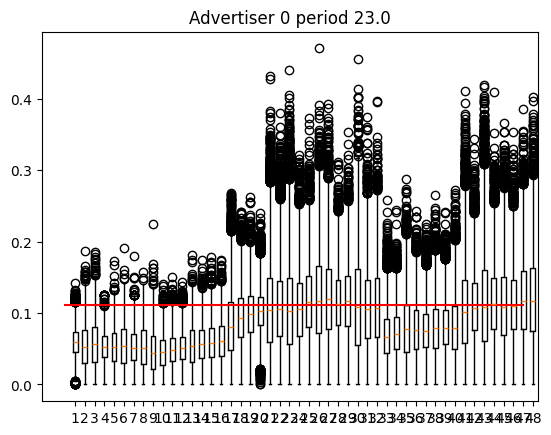

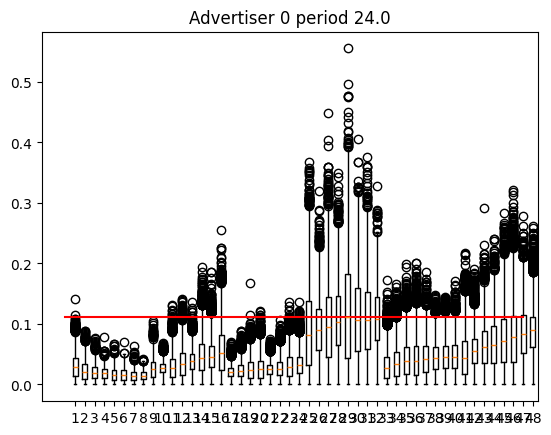

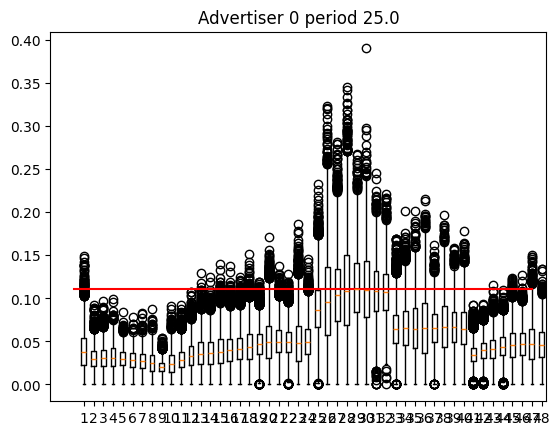

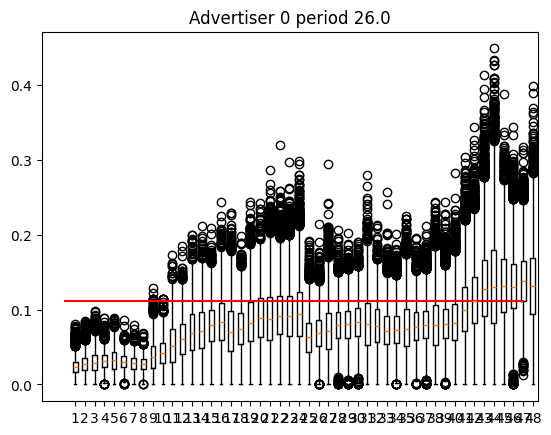

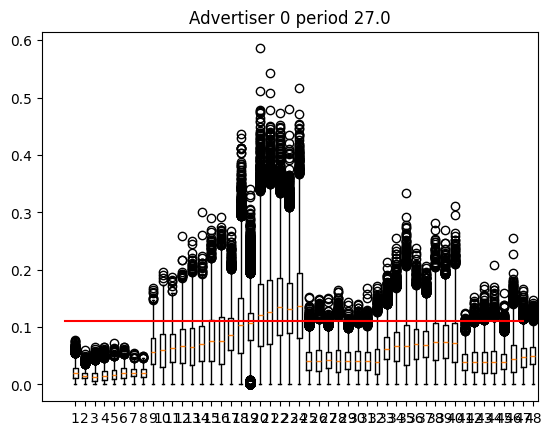

In [7]:
target_cpa = 9
advertiser_idx = 0

# for advertiser_idx in range(28):
for period in pvalues_df.deliveryPeriodIndex.unique():
    ad_pvalues_df = pvalues_df[(pvalues_df["advertiserNumber"] == advertiser_idx) & (pvalues_df["deliveryPeriodIndex"] == period)]

    min_cost_list = []
    pvalues_list = []
    for ts in ad_pvalues_df.timeStepIndex.unique():
        ts_min_cost = bids_df[(bids_df.timeStepIndex == ts) & (bids_df.deliveryPeriodIndex == period)].cost.item()[:, 0]
        min_cost_list.append(ts_min_cost)
        ts_pvalues = ad_pvalues_df[ad_pvalues_df.timeStepIndex == ts].pValue.item()
        pvalues_list.append(ts_pvalues)
    pvalues = np.concatenate(pvalues_list)
    min_cost = np.concatenate(min_cost_list)

    pv_over_cost  = []
    for ts_pvalues, ts_min_cost in zip(pvalues_list, min_cost_list):
        pv_over_cost.append(ts_pvalues / ts_min_cost)
        
    fig, ax = plt.subplots()
    # ax.plot([np.mean(v) for v in pv_over_cost])
    # plot mean and std of pv_over_cost
    # ax.errorbar(np.arange(48), [np.mean(v) for v in pv_over_cost], yerr=[np.std(v) for v in pv_over_cost])
    
    # plot boxplot of pv_over_cost
    ax.boxplot(pv_over_cost)
    ax.plot(np.arange(48), np.ones(48) / target_cpa, "r-")
    ax.set_title(f"Advertiser {advertiser_idx} period {period}")
    fig.show()
